In [309]:
#import packages for dates and plotting
import matplotlib.pyplot as plt
import datetime

In [310]:
#read and investigate file
import pandas as pd 
df = pd.read_json('logins.json') 

In [311]:
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [312]:
df.shape

(93142, 1)

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [314]:
#create non-index column
df['time']=df['login_time']

In [315]:
df[df.isna().any(axis=1)]


,login_time,time


In [316]:
df = df.set_index('login_time')

In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93142 entries, 1970-01-01 20:13:18 to 1970-04-13 18:54:23
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.4 MB


In [318]:
#create data frame for 15min blocks
df_fifteen = pd.DataFrame()
df_fifteen['count'] = df.time.resample('15Min').count()

In [319]:
df_fifteen

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
...,...
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2


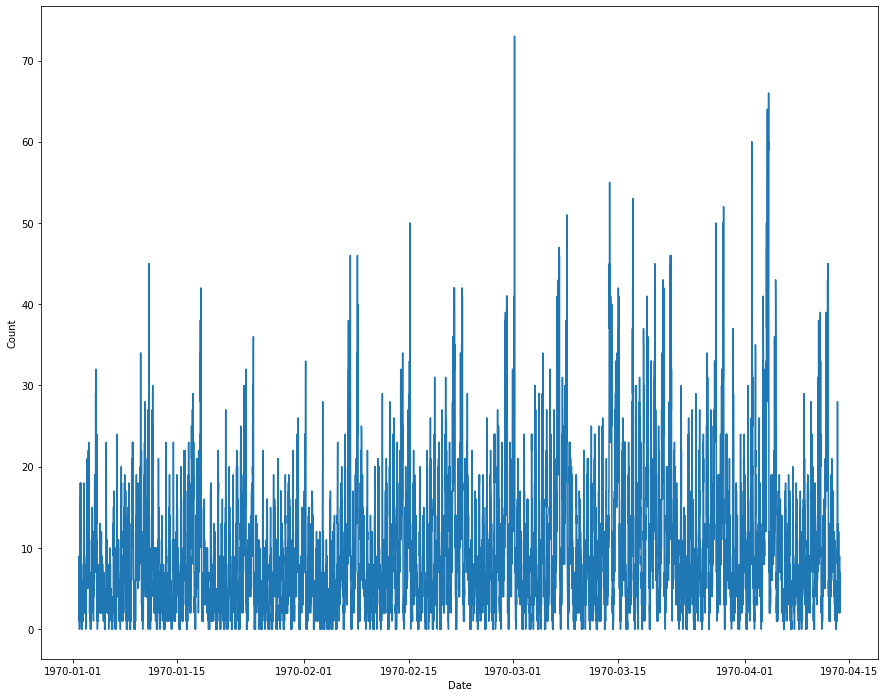

In [320]:
#viz

plt.plot(df_fifteen.index, df_fifteen['count'])


plt.xlabel('Date')
plt.ylabel('Count')

#plt.show()
plt.rcParams['figure.figsize'] = 15,12

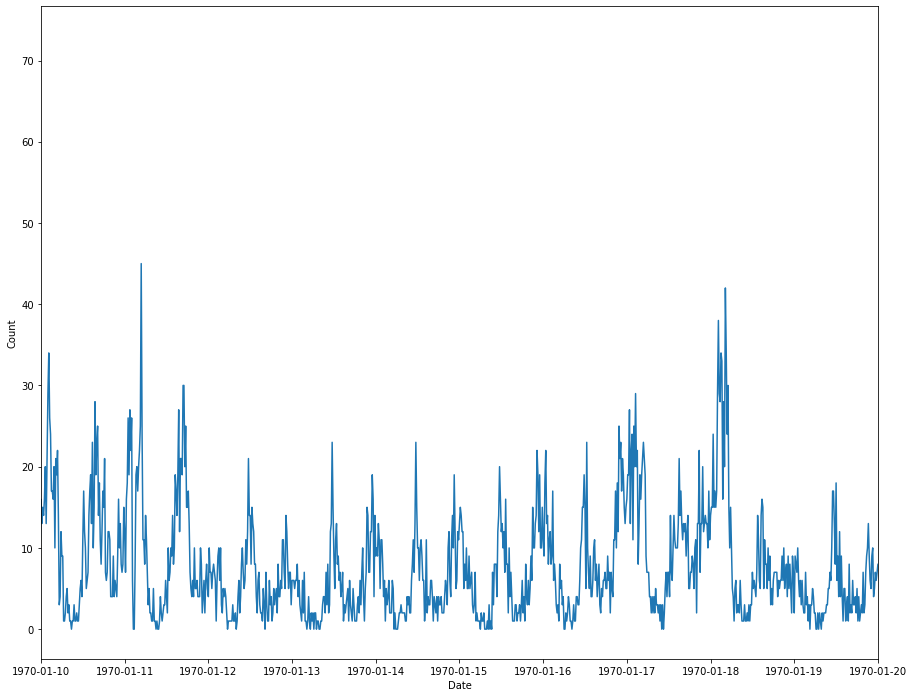

In [321]:
#zoom
x_min = datetime.datetime(1970,1,10)
x_max = datetime.datetime(1970,1,20)



plt.xlim(x_min, x_max)

plt.plot(df_fifteen.index, df_fifteen['count'])


plt.xlabel('Date')
plt.ylabel('Count')

#plt.show()
plt.rcParams['figure.figsize'] = 15,12


In [322]:
#create daily to observe spikes
df_day = pd.DataFrame()
df_day['count'] = df.time.resample('D').count()

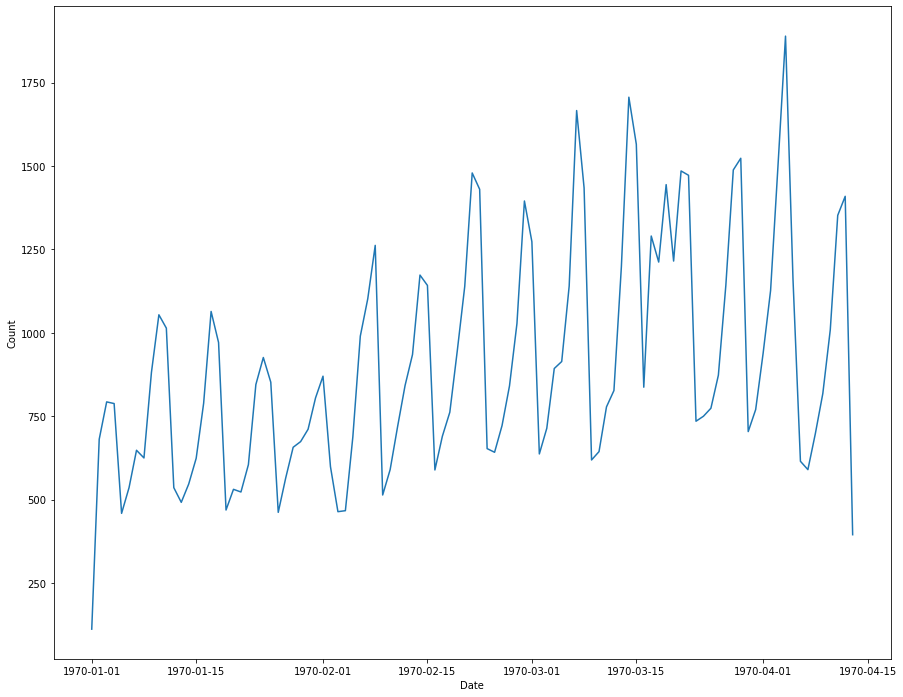

In [323]:
#x_min = datetime.datetime(1970,1,1)
#x_max = datetime.datetime(1970,2,1)


#plt.xlim(x_min, x_max)

plt.plot(df_day.index, df_day['count'])


plt.xlabel('Date')
plt.ylabel('Count')

#plt.show()
plt.rcParams['figure.figsize'] = 15,12

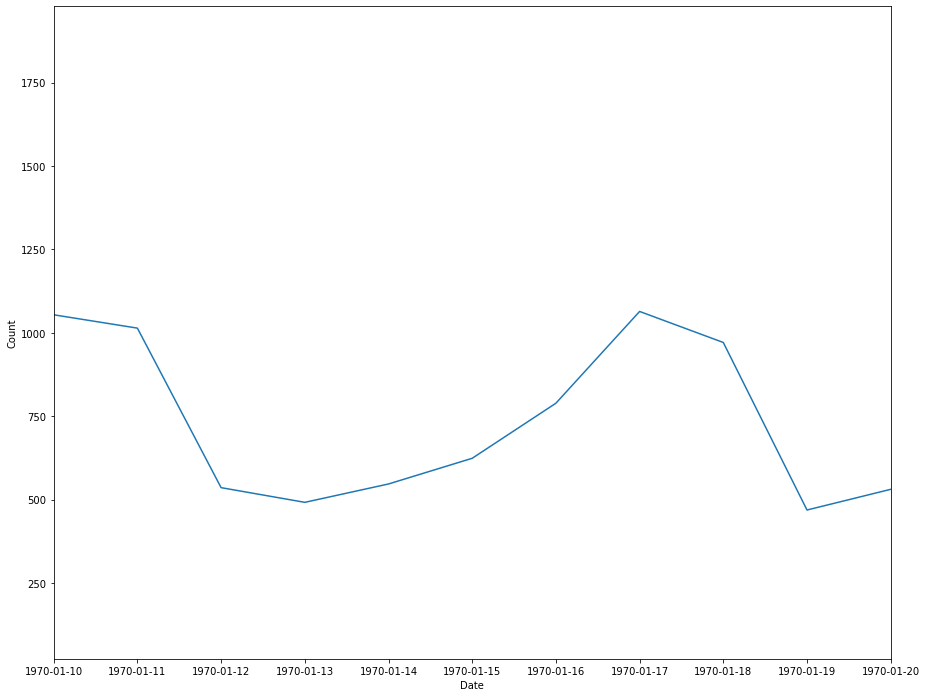

In [324]:
#zoom in to view hours
x_min = datetime.datetime(1970,1,10)
x_max = datetime.datetime(1970,1,20)


plt.xlim(x_min, x_max)

plt.plot(df_day.index, df_day['count'])


plt.xlabel('Date')
plt.ylabel('Count')

#plt.show()
plt.rcParams['figure.figsize'] = 15,12

In [325]:
#add weekdays
df_day['time']=df_day.index
df_fifteen['time']=df_fifteen.index

In [326]:
df_day.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 103 entries, 1970-01-01 to 1970-04-13
Freq: D
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   count   103 non-null    int64         
 1   time    103 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [327]:
#show day of week
df_day['dayname'] = df_day.time.dt.day_name()



df_fifteen['dayname']=df_fifteen.time.dt.day_name()

In [328]:
df_day

,count,time,dayname
login_time,,,
1970-01-01,112,1970-01-01,Thursday
1970-01-02,681,1970-01-02,Friday
1970-01-03,793,1970-01-03,Saturday
1970-01-04,788,1970-01-04,Sunday
1970-01-05,459,1970-01-05,Monday
...,...,...,...
1970-04-09,818,1970-04-09,Thursday
1970-04-10,1009,1970-04-10,Friday
1970-04-11,1352,1970-04-11,Saturday


In [329]:
#find peak days
df_day.groupby(['dayname']).max()

,count,time
dayname,,
Friday,1504,1970-04-10
Monday,837,1970-04-13
Saturday,1889,1970-04-11
Sunday,1565,1970-04-12
Thursday,1444,1970-04-09
Tuesday,1290,1970-04-07
Wednesday,1212,1970-04-08


In [330]:
#fix formats
df_fifteen['shorttime'] = df_fifteen.time.dt.hour.astype(str) + ':' + df_fifteen.time.dt.minute.astype(str)

In [331]:
df_fifteen['shorttime'] = pd.to_datetime(df_fifteen['time'],format= '%H:%M:%S' ).dt.time

In [332]:
df_fifteen

,count,time,dayname,shorttime
login_time,,,,
1970-01-01 20:00:00,2,1970-01-01 20:00:00,Thursday,20:00:00
1970-01-01 20:15:00,6,1970-01-01 20:15:00,Thursday,20:15:00
1970-01-01 20:30:00,9,1970-01-01 20:30:00,Thursday,20:30:00
1970-01-01 20:45:00,7,1970-01-01 20:45:00,Thursday,20:45:00
1970-01-01 21:00:00,1,1970-01-01 21:00:00,Thursday,21:00:00
...,...,...,...,...
1970-04-13 17:45:00,5,1970-04-13 17:45:00,Monday,17:45:00
1970-04-13 18:00:00,5,1970-04-13 18:00:00,Monday,18:00:00
1970-04-13 18:15:00,2,1970-04-13 18:15:00,Monday,18:15:00


In [333]:
df_fifteen_group = df_fifteen.groupby(['dayname','shorttime'])['count'].sum()


In [334]:
#group days to find individual peaks
df_fifteen_group

dayname    shorttime
Friday     00:00:00     237
           00:15:00     263
           00:30:00     232
           00:45:00     243
           01:00:00     259
                       ... 
Wednesday  22:45:00     193
           23:00:00     206
           23:15:00     221
           23:30:00     249
           23:45:00     232
Name: count, Length: 672, dtype: int64

In [ ]:
#select

In [335]:
df_fifteen_group.groupby(['dayname']).max()

dayname
Friday       416
Monday       273
Saturday     485
Sunday       584
Thursday     292
Tuesday      277
Wednesday    304
Name: count, dtype: int64

In [336]:
df_fifteen

,count,time,dayname,shorttime
login_time,,,,
1970-01-01 20:00:00,2,1970-01-01 20:00:00,Thursday,20:00:00
1970-01-01 20:15:00,6,1970-01-01 20:15:00,Thursday,20:15:00
1970-01-01 20:30:00,9,1970-01-01 20:30:00,Thursday,20:30:00
1970-01-01 20:45:00,7,1970-01-01 20:45:00,Thursday,20:45:00
1970-01-01 21:00:00,1,1970-01-01 21:00:00,Thursday,21:00:00
...,...,...,...,...
1970-04-13 17:45:00,5,1970-04-13 17:45:00,Monday,17:45:00
1970-04-13 18:00:00,5,1970-04-13 18:00:00,Monday,18:00:00
1970-04-13 18:15:00,2,1970-04-13 18:15:00,Monday,18:15:00


In [337]:
#aggregate to find peaks for each day
df_top = (df_fifteen.groupby(['dayname','shorttime'])['count'].agg(['sum']).sort_values(by='sum', ascending=False).reset_index().drop_duplicates('dayname', keep='first'))

In [338]:
df_top

,dayname,shorttime,sum
0,Sunday,04:45:00,584
3,Saturday,04:45:00,485
15,Friday,22:15:00,416
44,Wednesday,11:30:00,304
54,Thursday,11:15:00,292
68,Tuesday,11:30:00,277
71,Monday,11:30:00,273


In [339]:
df_top.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 71
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   dayname    7 non-null      object
 1   shorttime  7 non-null      object
 2   sum        7 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 224.0+ bytes


In [340]:
#wrangle time formats
df_top['shorttime2'] = df_top['shorttime'].astype(str)
df_top['shorttime3'] = (df_top['shorttime2'].str.split(':').str[0].astype(int) + df_top['shorttime2'].str.split(':').str[1].astype(int)/60

In [341]:
df_top

,dayname,shorttime,sum,shorttime2,shorttime3
0,Sunday,04:45:00,584,04:45:00,4.75
3,Saturday,04:45:00,485,04:45:00,4.75
15,Friday,22:15:00,416,22:15:00,22.25
44,Wednesday,11:30:00,304,11:30:00,11.50
54,Thursday,11:15:00,292,11:15:00,11.25
68,Tuesday,11:30:00,277,11:30:00,11.50
71,Monday,11:30:00,273,11:30:00,11.50


In [342]:
#get back to sortable times
df_top['retime'] = '1970-01-01 ' + df_top['shorttime'].astype(str)

In [343]:
df_top['retime'] = pd.to_datetime(df_top['retime'], format='%Y-%m-%f %H:%M:%S')

In [344]:
#get sortable day numbers
df_top.index=[0,6,5,3,4,2,1]

In [350]:
df_top

,dayname,shorttime,sum,shorttime2,shorttime3,retime
0,Sunday,04:45:00,584,04:45:00,4.75,1970-01-01 04:45:00.010
6,Saturday,04:45:00,485,04:45:00,4.75,1970-01-01 04:45:00.010
5,Friday,22:15:00,416,22:15:00,22.25,1970-01-01 22:15:00.010
3,Wednesday,11:30:00,304,11:30:00,11.50,1970-01-01 11:30:00.010
4,Thursday,11:15:00,292,11:15:00,11.25,1970-01-01 11:15:00.010
2,Tuesday,11:30:00,277,11:30:00,11.50,1970-01-01 11:30:00.010
1,Monday,11:30:00,273,11:30:00,11.50,1970-01-01 11:30:00.010


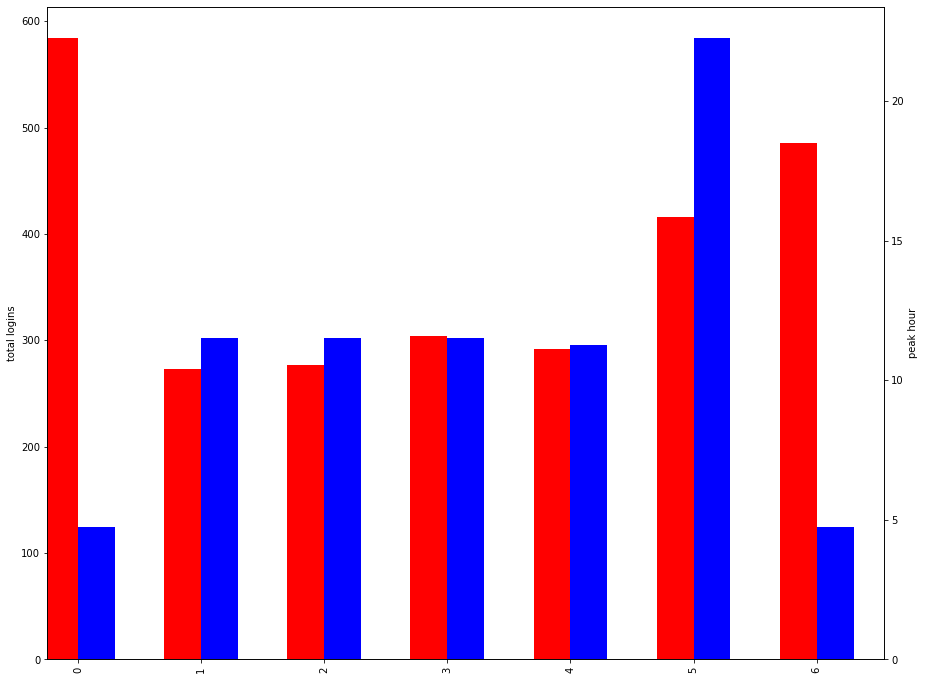

In [352]:
#plot
fig = plt.figure()

ax = fig.add_subplot(111) 
ax2 = ax.twinx() 

width = 0.3

df_top['sum'].plot(kind='bar', color='red', ax=ax, width=width, position=1)
df_top.shorttime3.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)


ax.set_ylabel('total logins')
ax2.set_ylabel('peak hour')

plt.show()


In [ ]:
#Data was fine.  Logins peak over the weekend, with logins running highest in the early morning hours. During the week,
#usage peaks mid-day, except Friday (Day 5) which peaks at ~4:00 pm